How are in-demand skills trending for data analysts?

Methodology

1. Aggregate skill counts monthly
2. Re-analyse based on percentage of total jobs
3. Plot the monthly skill demand

In [62]:
#import all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

#load te dataset
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [63]:
#i need only data analyst jobs and that also specific to the united states and make a copy of it
df_DA_US= df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()


In [64]:
#now we are going to create a new col in our new df called job_posted_month_no by accessing the job_posted_date col and applying the dt.month to get the month
#we are going to aggregate on a monthly basis thts why we created a col job_posted_month_no 
df_DA_US['job_posted_month_no']=df_DA_US['job_posted_date'].dt.month

In [65]:
#explode the job_skills col to convert each skill into individual rows
#then we can easily aggregate skills with month
#if we dont explode the skills col then we cant aggregate as its a list of skills
df_DA_US_explode=df_DA_US.explode('job_skills')

In [66]:
#now we are going to create a pivot table which contains skills and months and aggfunc=size to get the count of the different skills
#first step is we created a df which contains only data analyst jobs present in the us
#then what we did was in order to get the aggregation of skills on a monthly basis we need to do 2 things
#first create a new col called job_posted_month_no by accessing the job_posted_date and applying the dt.month method
#then we will explode the job_skills col to get it into individual rows
#now we have the months col and the skills exploded into individual rows we can now apply the aggregate function
#well get the count of the skills on a monthly basis

df_DA_US_pivot=df_DA_US_explode.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)
df_DA_US_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,assembly,atlassian,aurora,aws,azure,bash,bigquery,bitbucket,blazor,c,c#,c++,capacitor,cassandra,chainer,chef,clickup,clojure,cobol,codecommit,cognos,colocation,confluence,cordova,couchbase,couchdb,crystal,css,dart,databricks,...,sqlserver,ssis,ssrs,svelte,svn,swift,symphony,t-sql,tableau,tensorflow,terminal,terraform,theano,tidyr,tidyverse,trello,twilio,typescript,ubuntu,unify,unity,unix,unreal,vb.net,vba,visio,visual basic,vmware,vue,vue.js,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,39,7,206,21,7,1,0,15,17,0,42,10,1,400,363,31,101,35,0,173,77,103,1,7,0,5,0,0,7,1,154,1,111,1,2,0,117,36,3,106,...,1,167,188,0,1,8,6,84,2488,26,32,5,0,0,2,6,0,2,0,8,10,127,0,7,257,191,63,4,1,0,7,9,80,3,968,0,7,0,0,30
2,35,0,203,23,4,1,0,14,9,0,28,9,4,314,287,11,55,3,1,111,88,57,0,7,0,5,0,0,4,0,100,0,57,2,0,0,95,32,2,66,...,0,176,164,0,0,13,0,57,1676,12,32,3,0,0,2,4,3,0,0,4,3,50,0,6,164,148,79,2,9,0,6,6,92,3,738,3,0,0,0,19
3,39,1,219,5,5,6,1,14,11,0,25,12,4,292,248,19,58,0,0,100,54,66,0,10,0,0,3,0,6,0,119,1,78,3,0,0,78,36,0,47,...,1,108,126,0,0,10,0,75,1804,13,26,4,0,0,2,1,4,0,0,9,3,63,1,9,188,127,78,3,6,0,7,6,76,5,736,1,1,1,0,16
4,28,1,208,8,3,7,3,5,6,0,11,11,7,317,233,27,51,10,0,100,52,96,0,12,0,5,0,3,12,0,103,0,60,0,0,1,82,26,0,68,...,0,112,129,0,0,16,0,72,1789,9,34,5,0,0,1,2,0,1,0,12,4,47,0,6,211,133,75,8,4,0,2,4,86,9,695,8,1,0,0,12
5,27,3,144,15,8,9,1,5,13,0,19,4,10,210,182,9,36,4,1,105,78,67,0,3,0,0,0,1,10,0,92,0,49,1,0,0,76,23,1,62,...,0,87,86,0,3,4,2,55,1432,8,32,2,0,0,0,2,0,1,6,9,5,23,0,0,134,137,49,3,3,0,1,6,67,1,557,3,0,0,0,9
6,39,5,188,9,4,8,3,7,7,0,22,8,5,281,240,29,39,8,0,101,74,52,0,10,0,1,0,0,10,0,97,1,50,8,3,0,77,39,4,85,...,2,131,125,0,1,6,1,57,1628,7,17,3,0,0,2,0,0,5,0,17,3,65,0,4,192,160,45,6,1,0,5,2,69,8,721,5,0,0,0,20
7,42,2,160,5,3,5,5,6,2,0,20,12,13,274,228,12,53,9,0,105,37,65,0,10,0,1,0,0,8,0,105,0,52,2,0,0,68,23,1,76,...,1,82,117,0,1,2,2,46,1533,18,23,4,0,1,4,1,0,3,0,3,6,28,1,5,170,132,41,5,1,0,4,1,59,10,587,0,0,0,1,13
8,44,2,187,5,3,10,0,5,3,0,28,17,26,349,250,18,65,13,0,170,62,94,0,3,0,2,0,2,0,0,118,0,68,1,1,0,81,34,3,85,...,1,110,148,0,0,7,7,73,1951,26,22,1,0,0,5,3,0,0,2,7,7,54,0,3,237,162,34,5,0,0,3,6,87,4,752,0,0,0,0,26
9,22,3,145,11,2,3,4,4,3,0,16,7,17,265,190,14,33,6,0,104,41,60,0,7,0,2,0,0,9,0,77,0,38,3,3,0,59,30,1,61,...,0,70,101,0,3,3,2,35,1353,12,14,5,0,0,0,1,2,2,0,2,8,34,1,2,127,101,41,6,1,1,0,4,80,4,478,0,0,0,1,12


In [67]:
#now we are going to create a last row which will give us the sum of each col
#to create a row we use the .loc['row name'] method

df_DA_US_pivot.loc['Total']=df_DA_US_pivot.sum()
df_DA_US_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,assembly,atlassian,aurora,aws,azure,bash,bigquery,bitbucket,blazor,c,c#,c++,capacitor,cassandra,chainer,chef,clickup,clojure,cobol,codecommit,cognos,colocation,confluence,cordova,couchbase,couchdb,crystal,css,dart,databricks,...,sqlserver,ssis,ssrs,svelte,svn,swift,symphony,t-sql,tableau,tensorflow,terminal,terraform,theano,tidyr,tidyverse,trello,twilio,typescript,ubuntu,unify,unity,unix,unreal,vb.net,vba,visio,visual basic,vmware,vue,vue.js,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,39,7,206,21,7,1,0,15,17,0,42,10,1,400,363,31,101,35,0,173,77,103,1,7,0,5,0,0,7,1,154,1,111,1,2,0,117,36,3,106,...,1,167,188,0,1,8,6,84,2488,26,32,5,0,0,2,6,0,2,0,8,10,127,0,7,257,191,63,4,1,0,7,9,80,3,968,0,7,0,0,30
2,35,0,203,23,4,1,0,14,9,0,28,9,4,314,287,11,55,3,1,111,88,57,0,7,0,5,0,0,4,0,100,0,57,2,0,0,95,32,2,66,...,0,176,164,0,0,13,0,57,1676,12,32,3,0,0,2,4,3,0,0,4,3,50,0,6,164,148,79,2,9,0,6,6,92,3,738,3,0,0,0,19
3,39,1,219,5,5,6,1,14,11,0,25,12,4,292,248,19,58,0,0,100,54,66,0,10,0,0,3,0,6,0,119,1,78,3,0,0,78,36,0,47,...,1,108,126,0,0,10,0,75,1804,13,26,4,0,0,2,1,4,0,0,9,3,63,1,9,188,127,78,3,6,0,7,6,76,5,736,1,1,1,0,16
4,28,1,208,8,3,7,3,5,6,0,11,11,7,317,233,27,51,10,0,100,52,96,0,12,0,5,0,3,12,0,103,0,60,0,0,1,82,26,0,68,...,0,112,129,0,0,16,0,72,1789,9,34,5,0,0,1,2,0,1,0,12,4,47,0,6,211,133,75,8,4,0,2,4,86,9,695,8,1,0,0,12
5,27,3,144,15,8,9,1,5,13,0,19,4,10,210,182,9,36,4,1,105,78,67,0,3,0,0,0,1,10,0,92,0,49,1,0,0,76,23,1,62,...,0,87,86,0,3,4,2,55,1432,8,32,2,0,0,0,2,0,1,6,9,5,23,0,0,134,137,49,3,3,0,1,6,67,1,557,3,0,0,0,9
6,39,5,188,9,4,8,3,7,7,0,22,8,5,281,240,29,39,8,0,101,74,52,0,10,0,1,0,0,10,0,97,1,50,8,3,0,77,39,4,85,...,2,131,125,0,1,6,1,57,1628,7,17,3,0,0,2,0,0,5,0,17,3,65,0,4,192,160,45,6,1,0,5,2,69,8,721,5,0,0,0,20
7,42,2,160,5,3,5,5,6,2,0,20,12,13,274,228,12,53,9,0,105,37,65,0,10,0,1,0,0,8,0,105,0,52,2,0,0,68,23,1,76,...,1,82,117,0,1,2,2,46,1533,18,23,4,0,1,4,1,0,3,0,3,6,28,1,5,170,132,41,5,1,0,4,1,59,10,587,0,0,0,1,13
8,44,2,187,5,3,10,0,5,3,0,28,17,26,349,250,18,65,13,0,170,62,94,0,3,0,2,0,2,0,0,118,0,68,1,1,0,81,34,3,85,...,1,110,148,0,0,7,7,73,1951,26,22,1,0,0,5,3,0,0,2,7,7,54,0,3,237,162,34,5,0,0,3,6,87,4,752,0,0,0,0,26
9,22,3,145,11,2,3,4,4,3,0,16,7,17,265,190,14,33,6,0,104,41,60,0,7,0,2,0,0,9,0,77,0,38,3,3,0,59,30,1,61,...,0,70,101,0,3,3,2,35,1353,12,14,5,0,0,0,1,2,2,0,2,8,34,1,2,127,101,41,6,1,1,0,4,80,4,478,0,0,0,1,12


In [68]:
#now we have the total row we will sort our df
#so specify the df and we are sorting it by the row (to specify the row use the .loc[] method)
#sort it according to the index values not count values
df_DA_US_pivot=df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]

In [69]:
#now since the df is sorted we can drop the total row now
df_DA_US_pivot=df_DA_US_pivot.drop('Total')
df_DA_US_pivot

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,sql server,flow,aws,sap,go,snowflake,azure,outlook,sharepoint,spss,jira,alteryx,vba,java,looker,javascript,hadoop,visio,ssrs,qlik,c,spark,ssis,spreadsheet,sheets,cognos,mysql,ms access,databricks,windows,...,datarobot,redhat,sqlserver,elixir,nuix,heroku,ruby on rails,lua,unreal,erlang,mlr,svelte,electron,laravel,blazor,shogun,yarn,colocation,clickup,f#,tidyr,hugging face,next.js,vue.js,kotlin,ionic,xamarin,gtx,fastapi,microsoft lists,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,575,514,400,386,443,289,363,306,286,321,349,206,257,236,230,216,243,191,188,189,173,170,167,188,151,154,128,146,106,80,...,2,1,1,0,0,2,1,0,0,0,1,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,405,414,314,278,286,281,287,224,232,182,183,203,164,148,157,150,160,148,164,159,111,105,176,129,79,100,103,113,66,92,...,0,0,0,0,0,0,0,0,0,0,1,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,343,304,292,281,271,247,248,248,238,204,206,219,188,143,179,139,156,127,126,119,100,99,108,102,78,119,91,117,47,76,...,0,0,1,0,0,1,0,2,1,0,1,0,0,0,0,0,0,1,3,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,361,328,317,313,336,280,233,219,217,206,194,208,211,195,144,155,163,133,129,138,100,138,112,101,104,103,112,98,68,86,...,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,306,265,210,305,282,200,182,183,170,137,134,144,134,149,163,137,109,137,86,133,105,89,87,109,105,92,89,76,62,67,...,0,0,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,2862,2382,1628,1609,984,1017,989,721,624,414,287,297,281,293,278,270,240,194,189,187,166,188,192,135,137,145,118,160,125,119,101,111,131,116,109,97,82,74,85,69,...,0,0,2,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,296,301,274,271,222,223,228,185,145,151,146,160,170,157,150,170,107,132,117,88,105,117,82,84,103,105,85,78,76,59,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,437,338,349,300,293,271,250,262,228,228,228,187,237,183,180,225,126,162,148,124,170,138,110,106,142,118,106,98,85,87,...,1,2,1,1,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,295,264,265,233,207,221,190,191,180,165,150,145,127,146,152,143,99,101,101,76,104,75,70,66,83,77,90,60,61,80,...,2,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
''' 
1.we created a df which contains da jobs specifically in the us
2.we created a new col called job_posted_month_no by accessing the job_posted_date col and applying the dt.month method to get the month
3.then we exploded the job_skills col to get it into individual rows inorder to apply the aggfunc method
4.now well get the count of skills on a monthly basis and create a pivot table
5.now we create a row inorder to sort the df
6.we create a row with the help of.loc['rowname'] method and get the sum of each col
7.then we sort the df accoring to the row and also sspecifically by the index not count
8.since the df is sorted we can drop the last row
9.we groupby all the same job_titles together and apply the size method to count the no of times each pair came
10.then we divide each row of our df with the da_totals to get the percentage values
11.then convert month no to month
'''

" \n1.we created a df which contains da jobs specifically in the us\n2.we created a new col called job_posted_month_no by accessing the job_posted_date col and applying the dt.month method to get the month\n3.then we exploded the job_skills col to get it into individual rows inorder to apply the aggfunc method\n4.now well get the count of skills on a monthly basis and create a pivot table\n5.now we create a row inorder to sort the df\n6.we create a row with the help of.loc['rowname'] method and get the sum of each col\n7.then we sort the df accoring to the row and also sspecifically by the index not count\n8.since the df is sorted we can drop the last row\n9.we groupby all the same job_titles together and apply the size method to count the no of times each pair came\n10.then we divide each row of our df with the da_totals to get the percentage values\n11.then convert month no to month\n"

In [71]:
#we are grouping all the same job titles together and applying the size method to count how many repeating job_title pairs
#eg data analyst data science data analyst data science
#so all data analyst are grouped together => data analyst=2
#and all data science are grouped together=> data science=2
#now this is a series that we created
DA_totals=df_DA_US.groupby('job_posted_month_no').size()

In [72]:
#now we will divide each row of the df_DA_US_pivot and divide it by the DA_totals to get the percentage value
#we will use the div method
df_DA_US_percent=df_DA_US_pivot.div(DA_totals/100,axis=0)
df_DA_US_percent


job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,sql server,flow,aws,sap,go,snowflake,azure,outlook,sharepoint,spss,jira,alteryx,vba,java,looker,javascript,hadoop,visio,ssrs,qlik,c,spark,ssis,spreadsheet,sheets,cognos,mysql,ms access,databricks,windows,...,datarobot,redhat,sqlserver,elixir,nuix,heroku,ruby on rails,lua,unreal,erlang,mlr,svelte,electron,laravel,blazor,shogun,yarn,colocation,clickup,f#,tidyr,hugging face,next.js,vue.js,kotlin,ionic,xamarin,gtx,fastapi,microsoft lists,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,6.769484,6.051330,4.709206,4.544384,5.215446,3.402402,4.273605,3.602543,3.367083,3.779138,4.108783,2.425241,3.025665,2.778432,2.707794,2.542972,2.860843,2.248646,2.213327,2.225100,2.036732,2.001413,1.966094,2.213327,1.777725,1.813045,1.506946,1.718860,1.247940,0.941841,...,0.023546,0.011773,0.011773,0.000000,0.000000,0.023546,0.011773,0.000000,0.000000,0.000000,0.011773,0.000000,0.000000,0.000000,0.000000,0.035319,0.000000,0.011773,0.000000,0.011773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011773,0.011773,0.000000,0.000000
2,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,6.613325,6.760287,5.127368,4.539517,4.670150,4.588504,4.686479,3.657740,3.788374,2.971914,2.988243,3.314827,2.677988,2.416721,2.563684,2.449379,2.612671,2.416721,2.677988,2.596342,1.812541,1.714566,2.873939,2.106466,1.290007,1.632920,1.681907,1.845199,1.077727,1.502286,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016329,0.000000,0.000000,0.032658,0.016329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,5.516243,4.889032,4.696044,4.519138,4.358315,3.972338,3.988421,3.988421,3.827597,3.280798,3.312962,3.522033,3.023480,2.299775,2.878739,2.235445,2.508845,2.042457,2.026375,1.913799,1.608234,1.592152,1.736893,1.640399,1.254423,1.913799,1.463493,1.881634,0.755870,1.222258,...,0.000000,0.000000,0.016082,0.000000,0.000000,0.016082,0.000000,0.032165,0.016082,0.000000,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016082,0.048247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016082,0.000000,0.00000,0.000000,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,5.967929,5.422384,5.240536,5.174409,5.554637,4.628864,3.851876,3.620433,3.587370,3.405522,3.207142,3.438585,3.488180,3.223673,2.380559,2.562407,2.694660,2.198711,2.132584,2.281369,1.653166,2.281369,1.851546,1.669697,1.719292,1.702761,1.851546,1.620102,1.124153,1.421723,...,0.016532,0.016532,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000
5,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,6.128580,5.307430,4.205888,6.108552,5.647907,4.005608,3.645103,3.665131,3.404767,2.743841,2.683757,2.884038,2.683757,2.984178,3.264570,2.743841,2.183056,2.743841,1.722411,2.663729,2.102944,1.782495,1.742439,2.183056,2.102944,1.842580,1.782495,1.522131,1.24173

In [73]:
#this is the code to convert month no to months:

#now in the job_posted_month_no we need the month names instead of the month no
df_DA_US_percent=df_DA_US_percent.reset_index()
#create a new col job_posted_month by accessing the job_posted_month_no col and applying the apply method and lambda on each of the values in the job_posted_month_no
df_DA_US_percent['job_posted_month']=df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x,format='%m').strftime('%b'))
#now since the col is not named name the col as job_posted_month
df_DA_US_percent=df_DA_US_percent.set_index('job_posted_month')
#now no need of job_posted_month_no therefore drop it
df_DA_US_percent=df_DA_US_percent.drop(columns='job_posted_month_no')
df_DA_US_percent


job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,sql server,flow,aws,sap,go,snowflake,azure,outlook,sharepoint,spss,jira,alteryx,vba,java,looker,javascript,hadoop,visio,ssrs,qlik,c,spark,ssis,spreadsheet,sheets,cognos,mysql,ms access,databricks,windows,...,datarobot,redhat,sqlserver,elixir,nuix,heroku,ruby on rails,lua,unreal,erlang,mlr,svelte,electron,laravel,blazor,shogun,yarn,colocation,clickup,f#,tidyr,hugging face,next.js,vue.js,kotlin,ionic,xamarin,gtx,fastapi,microsoft lists,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,6.769484,6.051330,4.709206,4.544384,5.215446,3.402402,4.273605,3.602543,3.367083,3.779138,4.108783,2.425241,3.025665,2.778432,2.707794,2.542972,2.860843,2.248646,2.213327,2.225100,2.036732,2.001413,1.966094,2.213327,1.777725,1.813045,1.506946,1.718860,1.247940,0.941841,...,0.023546,0.011773,0.011773,0.000000,0.000000,0.023546,0.011773,0.000000,0.000000,0.000000,0.011773,0.000000,0.000000,0.000000,0.000000,0.035319,0.000000,0.011773,0.000000,0.011773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011773,0.011773,0.000000,0.000000
Feb,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,6.613325,6.760287,5.127368,4.539517,4.670150,4.588504,4.686479,3.657740,3.788374,2.971914,2.988243,3.314827,2.677988,2.416721,2.563684,2.449379,2.612671,2.416721,2.677988,2.596342,1.812541,1.714566,2.873939,2.106466,1.290007,1.632920,1.681907,1.845199,1.077727,1.502286,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016329,0.000000,0.000000,0.032658,0.016329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,5.516243,4.889032,4.696044,4.519138,4.358315,3.972338,3.988421,3.988421,3.827597,3.280798,3.312962,3.522033,3.023480,2.299775,2.878739,2.235445,2.508845,2.042457,2.026375,1.913799,1.608234,1.592152,1.736893,1.640399,1.254423,1.913799,1.463493,1.881634,0.755870,1.222258,...,0.000000,0.000000,0.016082,0.000000,0.000000,0.016082,0.000000,0.032165,0.016082,0.000000,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016082,0.048247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016082,0.000000,0.00000,0.000000,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,5.967929,5.422384,5.240536,5.174409,5.554637,4.628864,3.851876,3.620433,3.587370,3.405522,3.207142,3.438585,3.488180,3.223673,2.380559,2.562407,2.694660,2.198711,2.132584,2.281369,1.653166,2.281369,1.851546,1.669697,1.719292,1.702761,1.851546,1.620102,1.124153,1.421723,...,0.016532,0.016532,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000
May,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,6.128580,5.307430,4.205888,6.108552,5.647907,4.005608,3.645103,3.665131,3.404767,2.743841,2.683757,2.884038,2.683757,2.984178,3.264570,2.743841,2.183056,2.743841,1.722411,2.663729,2.102944,1.782495,1.742439,2.183056,2.102944,1.842580,1.782495,1.522131,

In [74]:
#we need all the rows of the first 5 cols by using the .iloc[] method
df_plot=df_DA_US_percent.iloc[:,:5]

([Text(11.289276713709679, 47.51322082231468, 'sql'),
  Text(11.075819052419357, 39.39560333048257, 'excel'),
  Text(10.882182459677422, 30.049047235879097, 'tableau'),
  Text(10.86693548387097, 27.76804298704075, 'python'),
  Text(11.235912298387099, 20.672306019600434, 'sas')],
 [<matplotlib.patches.FancyArrowPatch at 0x2541e556390>])

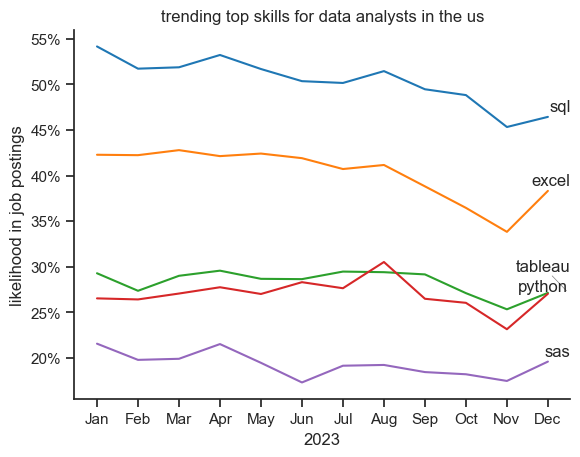

In [75]:
#now well plot this using seaborn
sns.lineplot(data=df_plot,dashes=False,palette='tab10')
sns.set_theme(style='ticks')
sns.despine()
plt.title('trending top skills for data analysts in the us')
plt.ylabel('likelihood in job postings')
plt.xlabel('2023')
plt.legend().remove()

#we neeed our yaxis values to be in percent format
#therefore with the help of set_major_formatter method we will do it


#first get the current axis
ax=plt.gca()
#now we will access the yaxis and apply the percent formatter method
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))


#we need to give the text for each line therefore we will apply a for loop
#Creates an empty list to store all the text labels
texts = []

#Loops 5 times (once for each skill line)
for i in range(5):
    #For each skill: adds a text label at position x=11.5 (right side), y=the last data point value, with the skill name as text. Saves each label to the list.
    texts.append(plt.text(11.5, df_plot.iloc[-1,i], df_plot.columns[i]))

#Automatically moves the labels so they don't overlap, and draws thin gray lines connecting labels to their original positions if they were moved
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))


In [76]:
''' 
plt.text(x, y, text) - This places text at position (x, y) on the chart

11.5 - This is the x-position (horizontal). It places the label at position 11.5 on the x-axis (to the right of your 12 months)

df_plot.iloc[-1, i] - This is the y-position (vertical)

iloc[-1, i] means: go to the last row (-1) and column number i
This gets the final value of each line (the December 2023 value)
Example: if i=0 (sql), it gets sql's value in December
df_plot.columns[i] - This is the actual text to display

columns[i] gets the column name at position i
Example: if i=0, it gives you 'sql', if i=1, it gives you 'excel', etc.
'''

" \nplt.text(x, y, text) - This places text at position (x, y) on the chart\n\n11.5 - This is the x-position (horizontal). It places the label at position 11.5 on the x-axis (to the right of your 12 months)\n\ndf_plot.iloc[-1, i] - This is the y-position (vertical)\n\niloc[-1, i] means: go to the last row (-1) and column number i\nThis gets the final value of each line (the December 2023 value)\nExample: if i=0 (sql), it gets sql's value in December\ndf_plot.columns[i] - This is the actual text to display\n\ncolumns[i] gets the column name at position i\nExample: if i=0, it gives you 'sql', if i=1, it gives you 'excel', etc.\n"